In [57]:
import pandas as pd, numpy as np, datetime as dt
import os
# create characteristic matrices
from characteristics import input_map
from fundamental_factors import base_fundamental_data_location
from characteristics import CharacterisitcMaker
ROOT = '/home/manish/code/dl/data/standardized_factors/'


In [61]:
def file2name(ROOT):
    mp = {}
    for i in os.listdir(ROOT):
        mp[i] = i.split('.')[0].upper().replace('_', '')
    return mp

In [63]:
r

,A,AA,AABA,AAL,AALB.AS,AAME,AAON,AAP,AAPL,AAXN,...,ZEUS,ZG,ZI,ZION,ZIONP,ZIXI,ZM,ZNGA,ZS,ZTS
date,,,,,,,,,,,,,,,,,,,,,
1970-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-10-31,NaN,0.059971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-11-30,NaN,0.008338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-12-31,NaN,0.078488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-01-31,NaN,0.145552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0.149752,0.130061,0.0,-0.125729,-0.040856,-0.005618,0.137071,0.152262,0.082165,-0.147552,...,0.170741,0.331190,NaN,0.053108,-0.000948,0.226277,0.327809,0.213528,0.129994,0.077952
2020-06-30,0.004715,0.220413,0.0,-0.117797,0.184179,-0.082425,0.005735,0.026016,0.147386,0.291864,...,0.065277,-0.008282,NaN,0.033123,-0.037659,0.026786,0.412637,0.042623,0.116322,-0.016859
2020-07-31,0.090076,0.156584,0.0,-0.149197,0.034258,0.114458,0.091361,0.053984,0.165132,-0.152858,...,-0.099576,0.184586,-0.199099,-0.045000,0.063621,0.031884,0.001459,0.030398,0.185845,0.108381


In [64]:
c = CharacterisitcMaker('DOLVOL')
u = c.universe().resample('ME').last()
p = (1+c.returns()).cumprod().resample('ME').last()
r = p.pct_change()
ret = r.reindex(columns=u.columns, index=u.index)[u]
ret[u & ret.isna()] = 0

/tmp/ipykernel_1070256/2775089345.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  r = p.pct_change()


In [68]:
u

,A,AA,AABA,AAL,AALB.AS,AAME,AAON,AAP,AAPL,AAXN,...,ZEUS,ZG,ZI,ZION,ZIONP,ZIXI,ZM,ZNGA,ZS,ZTS
date,,,,,,,,,,,,,,,,,,,,,
1992-04-30,False,True,False,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
1992-05-31,False,True,False,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
1992-06-30,False,True,False,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
1992-07-31,False,True,False,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
1992-08-31,False,True,False,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,True,False,False,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,True,True,True
2020-06-30,True,False,False,False,False,False,False,True,True,False,...,False,True,True,False,False,False,True,True,True,True
2020-07-31,True,False,False,False,False,False,False,True,True,False,...,False,True,True,False,False,False,True,True,True,True


In [3]:
data = {}
for t in list(input_map.keys())+list(base_fundamental_data_location.keys()):
    print(t)
    try:
        raw = pd.read_parquet(f'{ROOT}{t}.parquet')[u].rank(axis=1, pct=True)*2-1 
        raw[u & raw.isna()] = 0 
        data[t] = raw 
    except Exception as e:
        print(f'skipping {t}')

MOM_1M
ZEROTRADE
ME
STD_DOL_VOL
SEAS1A
BETA
CHCSHO
RVAR_MEAN
MOM6M
DOLVOL
MOM60M
skipping MOM60M
MOM36M
skipping MOM36M
TURN
STD_TURN
MOM12M
skipping MOM12M
RVAR_CAPM
RVAR_FF3
skipping RVAR_FF3
earningsYield
revenuePerShare
taxPayables
totalAssets
numberOfShares
bookValuePerShare
skipping bookValuePerShare
stockPrice
netIncomePerShare
netIncome
skipping netIncome
totalStockholdersEquity
debtToEquity
depreciationAndAmortization
skipping depreciationAndAmortization
tangibleAssetValue
operatingCashFlow
skipping operatingCashFlow
totalDebt
operatingCashFlowPerShare
dividendYield
researchAndDdevelopementToRevenue
returnOnTangibleAssets
cashAtEndOfPeriod
skipping cashAtEndOfPeriod
changeInWorkingCapital
skipping changeInWorkingCapital
longTermDebt


In [4]:
len(data)

29

In [5]:
all_cha = pd.concat(data, axis=1)

In [6]:
all_cha.columns.get_level_values(0).unique()

Index(['MOM_1M', 'ZEROTRADE', 'ME', 'STD_DOL_VOL', 'SEAS1A', 'BETA', 'CHCSHO',
       'RVAR_MEAN', 'MOM6M', 'DOLVOL', 'TURN', 'STD_TURN', 'RVAR_CAPM',
       'earningsYield', 'revenuePerShare', 'taxPayables', 'totalAssets',
       'numberOfShares', 'stockPrice', 'netIncomePerShare',
       'totalStockholdersEquity', 'debtToEquity', 'tangibleAssetValue',
       'totalDebt', 'operatingCashFlowPerShare', 'dividendYield',
       'researchAndDdevelopementToRevenue', 'returnOnTangibleAssets',
       'longTermDebt'],
      dtype='object')

In [13]:
np.savetxt(f'{ROOT}/ret.v2.txt', ret.fillna(0))

<Axes: xlabel='date'>

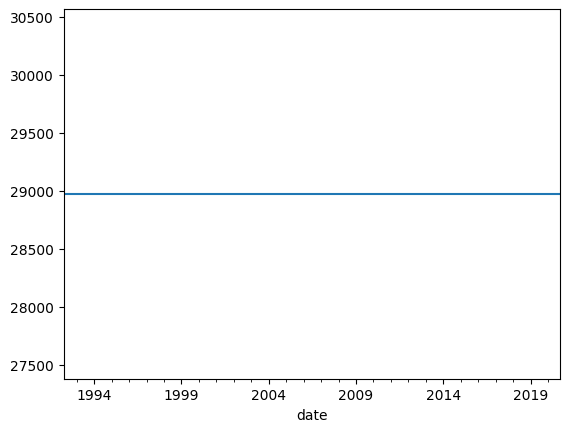

In [8]:
all_cha.count(1).plot()

In [16]:
np.savetxt(f'{ROOT}/char.v2.txt', (all_cha.fillna(0)*1000).astype(np.int8))

In [8]:
all_cha.iloc[0].dropna()

MOM_1M        AA     -0.803804
              AAME   -0.997998
              AAPL   -0.275275
              AB      0.771772
              ABM     0.119119
                        ...   
longTermDebt  XRX     0.963760
              Y       0.608154
              ZBRA   -0.825595
              ZION    0.232163
              ZIXI   -0.825595
Name: 1992-04-30 00:00:00, Length: 28971, dtype: float64

In [9]:
ret.iloc[0].dropna()

AA      0.104182
AAME    0.359739
AAPL    0.032189
AB     -0.139905
ABM    -0.018748
          ...   
XRX     0.036714
Y      -0.019921
ZBRA   -0.027419
ZION    0.020386
ZIXI   -0.209094
Name: 1992-04-30 00:00:00, Length: 999, dtype: float64

In [11]:
cha = []
for i,v in all_cha.iterrows():
    d = v.dropna()
    print(i, v.shape, d.shape)
    cha.append(d)

1992-04-30 00:00:00 (85289,) (28971,)
1992-05-31 00:00:00 (85289,) (28971,)
1992-06-30 00:00:00 (85289,) (28971,)
1992-07-31 00:00:00 (85289,) (28971,)
1992-08-31 00:00:00 (85289,) (28971,)
1992-09-30 00:00:00 (85289,) (28971,)
1992-10-31 00:00:00 (85289,) (28971,)
1992-11-30 00:00:00 (85289,) (28971,)
1992-12-31 00:00:00 (85289,) (28971,)
1993-01-31 00:00:00 (85289,) (28971,)
1993-02-28 00:00:00 (85289,) (28971,)
1993-03-31 00:00:00 (85289,) (28971,)
1993-04-30 00:00:00 (85289,) (28971,)
1993-05-31 00:00:00 (85289,) (28971,)
1993-06-30 00:00:00 (85289,) (28971,)
1993-07-31 00:00:00 (85289,) (28971,)
1993-08-31 00:00:00 (85289,) (28971,)
1993-09-30 00:00:00 (85289,) (28971,)
1993-10-31 00:00:00 (85289,) (28971,)
1993-11-30 00:00:00 (85289,) (28971,)
1993-12-31 00:00:00 (85289,) (28971,)
1994-01-31 00:00:00 (85289,) (28971,)
1994-02-28 00:00:00 (85289,) (28971,)
1994-03-31 00:00:00 (85289,) (28971,)
1994-04-30 00:00:00 (85289,) (28971,)
1994-05-31 00:00:00 (85289,) (28971,)
1994-06-30 0

In [12]:
cha = np.array(cha)

In [14]:
cha.shape

(342, 28971)

In [15]:
fre = []
for i,v in ret.iterrows():
    d = v.dropna()
    print(i, v.shape, d.shape)
    fre.append(d)
fre = np.array(fre)
fre

1992-04-30 00:00:00 (2941,) (999,)
1992-05-31 00:00:00 (2941,) (999,)
1992-06-30 00:00:00 (2941,) (999,)
1992-07-31 00:00:00 (2941,) (999,)
1992-08-31 00:00:00 (2941,) (999,)
1992-09-30 00:00:00 (2941,) (999,)
1992-10-31 00:00:00 (2941,) (999,)
1992-11-30 00:00:00 (2941,) (999,)
1992-12-31 00:00:00 (2941,) (999,)
1993-01-31 00:00:00 (2941,) (999,)
1993-02-28 00:00:00 (2941,) (999,)
1993-03-31 00:00:00 (2941,) (999,)
1993-04-30 00:00:00 (2941,) (999,)
1993-05-31 00:00:00 (2941,) (999,)
1993-06-30 00:00:00 (2941,) (999,)
1993-07-31 00:00:00 (2941,) (999,)
1993-08-31 00:00:00 (2941,) (999,)
1993-09-30 00:00:00 (2941,) (999,)
1993-10-31 00:00:00 (2941,) (999,)
1993-11-30 00:00:00 (2941,) (999,)
1993-12-31 00:00:00 (2941,) (999,)
1994-01-31 00:00:00 (2941,) (999,)
1994-02-28 00:00:00 (2941,) (999,)
1994-03-31 00:00:00 (2941,) (999,)
1994-04-30 00:00:00 (2941,) (999,)
1994-05-31 00:00:00 (2941,) (999,)
1994-06-30 00:00:00 (2941,) (999,)
1994-07-31 00:00:00 (2941,) (999,)
1994-08-31 00:00:00 

array([[ 0.1041824 ,  0.35973853,  0.03218872, ..., -0.02741888,
         0.02038573, -0.20909403],
       [ 0.00207149, -0.45239208, -0.00623661, ...,  0.09859548,
         0.04500923, -0.18390387],
       [-0.02377292, -0.18186826, -0.19665331, ..., -0.06408511,
         0.09308661, -0.1126801 ],
       ...,
       [ 0.09007582,  0.05398385,  0.16513164, ...,  0.03039832,
         0.18584475,  0.1083814 ],
       [ 0.0424582 ,  0.04109496,  0.21437973, ..., -0.07833164,
         0.10388907,  0.05551164],
       [-0.01812388, -0.01100379, -0.13205203, ..., -0.07836645,
        -0.10353004, -0.00943167]])

In [16]:
cha.shape, fre.shape

((342, 28971), (342, 999))

In [20]:
np.savetxt(f'{ROOT}/ret.v1.txt', fre.round(6))

In [24]:
np.savetxt(f'{ROOT}/char.v1.txt', (cha*1000).astype(np.int8))

In [33]:
f = (1+c.ff3().fillna(0)*0.01).cumprod().resample('ME').last()
ff3 = f.pct_change()
ff3 = ff3.reindex(index=u.index).fillna(0)

In [34]:
ff3

,Mkt-RF,SMB,HML
date,,,
1992-04-30,0.010729,-0.059523,0.044112
1992-05-31,0.003036,0.004177,0.011092
1992-06-30,-0.023392,-0.031581,0.034031
1992-07-31,0.037701,-0.004595,-0.005935
1992-08-31,-0.023795,-0.001148,-0.011462
...,...,...,...
2020-05-31,0.056097,0.024574,-0.042174
2020-06-30,0.025171,0.027979,-0.017339
2020-07-31,0.057584,-0.021695,-0.015053


In [35]:
np.savetxt(f'{ROOT}/ff3.v1.txt', ff3.values)

In [2]:
import pickle

In [37]:
pickle.load(open(f'parameters.pickle', 'rb'))

2024-11-14 23:32:33.127860: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


{'param': {'epoch': 50,
  'train_ratio': 1,
  'train_algo': tensorflow.python.training.adam.AdamOptimizer,
  'split': 'future',
  'activation': <function tensorflow.python.ops.gen_math_ops.tanh(x, name=None)>,
  'start': 1,
  'batch_size': 120,
  'learning_rate': 0.005,
  'Lambda': 1,
  'Lambda2': 1},
 'layers': [64, 32, 16, 8, 4]}

In [41]:
dc = pd.DataFrame(pickle.load(open(f'factors.pickle', 'rb')))

<Axes: >

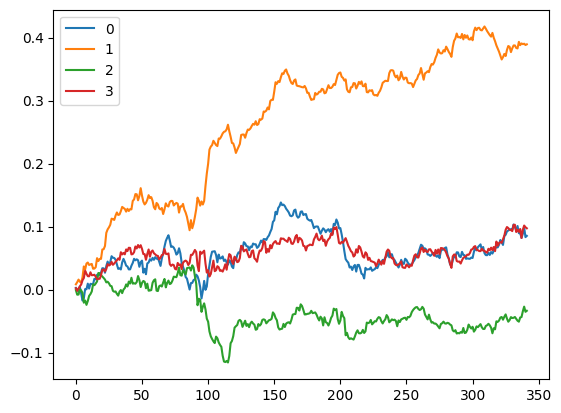

In [43]:
dc.cumsum().plot()

In [46]:
pickle.load(open(f'characteristics.pickle', 'rb'))

array([[ 0.9889683 , -0.6131862 ,  1.        , -0.6104915 ],
       [-0.9748597 ,  0.25739688,  0.9584849 , -0.9944467 ],
       [ 0.9999353 , -0.13887064,  0.1579411 ,  0.11412887],
       ...,
       [ 0.9574574 ,  0.37570295,  0.55913854, -1.        ],
       [ 0.81977856, -0.6480803 ,  1.        ,  0.8947771 ],
       [ 0.71850634, -0.9686386 ,  1.        ,  0.9971291 ]],
      dtype=float32)

<Axes: >

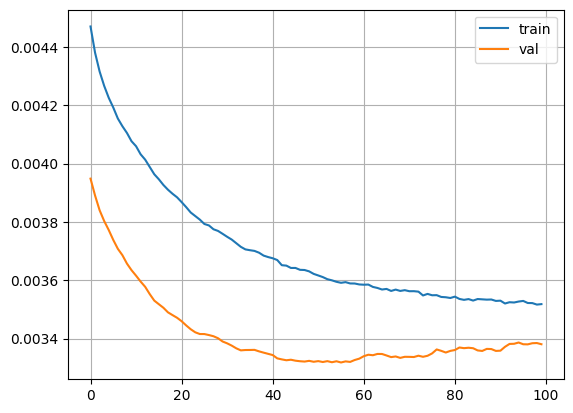

In [32]:
import pickle
import pandas as pd
a, b, c, d = pickle.load(open(f'data/loss.pickle', 'rb'))
pd.DataFrame({'train': a, 'val': b}).plot(grid=True)

<Axes: >

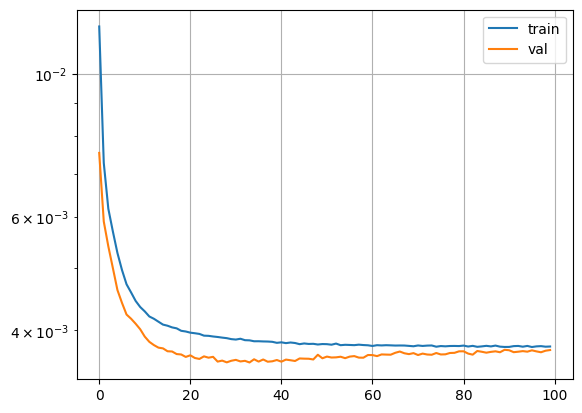

In [37]:
import pickle
import pandas as pd
a, b, c, d = pickle.load(open(f'data/loss.pickle', 'rb'))
pd.DataFrame({'train': a, 'val': b}).plot(grid=True, logy=True)

<Axes: >

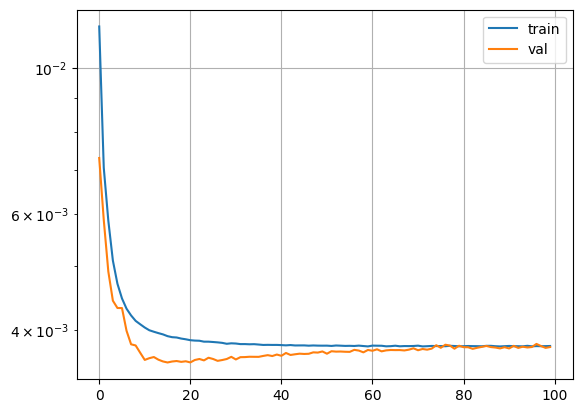

In [38]:
import pickle
import pandas as pd
a, b, c, d = pickle.load(open(f'data/loss.pickle', 'rb'))
pd.DataFrame({'train': a, 'val': b}).plot(grid=True, logy=True)

In [11]:
pd.DataFrame({'train': a, 'test': b})

,train,test
0,3482.928711,3482.922363
1,3460.832764,3460.826416
2,3438.830566,3438.824219
3,3416.933594,3416.927246
4,3395.107910,3395.101562
...,...,...
995,2.859645,2.855620
996,2.841739,2.837711
997,2.872184,2.868159
998,2.890726,2.886697


In [3]:
import numpy as np

In [4]:
    ROOT = '/home/manish/code/dl/data/'

    Z = np.loadtxt(f"{ROOT}char.v2.txt").astype(np.float32)

In [7]:
Z = pd.DataFrame(Z)

In [8]:
Z

,0,1,2,3,4,5,6,7,8,9,...,85279,85280,85281,85282,85283,85284,85285,85286,85287,85288
0,0.0,-35.0,0.0,0.0,0.0,27.0,0.0,0.0,-19.0,0.0,...,0.0,0.0,0.0,-24.0,0.0,-57.0,0.0,0.0,0.0,0.0
1,0.0,121.0,0.0,0.0,0.0,-27.0,0.0,0.0,-7.0,0.0,...,0.0,0.0,0.0,-25.0,0.0,-61.0,0.0,0.0,0.0,0.0
2,0.0,-23.0,0.0,0.0,0.0,111.0,0.0,0.0,93.0,0.0,...,0.0,0.0,0.0,-34.0,0.0,-57.0,0.0,0.0,0.0,0.0
3,0.0,87.0,0.0,0.0,0.0,-51.0,0.0,0.0,-21.0,0.0,...,0.0,0.0,0.0,-43.0,0.0,-56.0,0.0,0.0,0.0,0.0
4,0.0,63.0,0.0,0.0,0.0,-77.0,0.0,0.0,53.0,0.0,...,0.0,0.0,0.0,-46.0,0.0,-54.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,49.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,11.0,0.0,...,0.0,109.0,0.0,0.0,0.0,0.0,95.0,-125.0,95.0,-59.0
338,55.0,0.0,0.0,0.0,0.0,0.0,0.0,-21.0,-109.0,0.0,...,0.0,-119.0,-83.0,0.0,0.0,0.0,92.0,121.0,92.0,7.0
339,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.0,-77.0,0.0,...,0.0,-115.0,-73.0,0.0,0.0,0.0,93.0,-123.0,93.0,9.0
340,65.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,115.0,0.0,...,0.0,-115.0,-75.0,0.0,0.0,0.0,90.0,-127.0,90.0,11.0


In [9]:
np.linalg.matrix_rank(Z)

342

In [80]:
ROOT = '/home/manish/code/dl/data/standardized_factors/'
u = pd.read_parquet(f'{ROOT}universe_monthly.parquet')

In [83]:
Z = np.loadtxt(f"{ROOT}standardized_factors_MERGED.txt").astype(np.float32)

In [87]:
r = np.loadtxt(f"{ROOT}ret.v2.txt").astype(np.float32)

In [89]:
f = np.loadtxt(f"{ROOT}ff3.v1.txt").astype(np.float32)

In [90]:
Z.shape, u.shape, r.shape, f.shape

((342, 147050), (342, 2941), (342, 2941), (342, 3))

In [93]:
u.values.shape

(342, 2941)